In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import dateutil
from datetime import datetime
from ggplot import *
from IPython.html.widgets import interact

# Data metadata:
# CSV file where first column is string date in dd/mm/YYYY H:M:S format and second column is the bitcoin price in US dollars
# Pandas.read_csv has an awesome converters parameter that allows us to convert or modify a column's data on the fly!
# Therefore, we can read the first column as an actual Python datetime object instead of as a string.
# I stripped the time from the date values by invoking datetime.date()
bitcoin_data = pd.read_csv("http://blockchain.info/charts/market-price?showDataPoints=false&timespan=&show_header=true&daysAverageString=1&scale=0&format=csv&address=",
                 index_col=None, names=['Date','Price'], converters={0: lambda x: datetime.date(datetime.strptime(x, '%d/%m/%Y %H:%M:%S'))})

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [66]:
bitcoin_data.head()

,Date,Price
0,2013-11-19,559.99
1,2013-11-20,595.00
2,2013-11-21,694.95
3,2013-11-22,761.00
4,2013-11-23,837.99


<IPython.core.display.Javascript object>


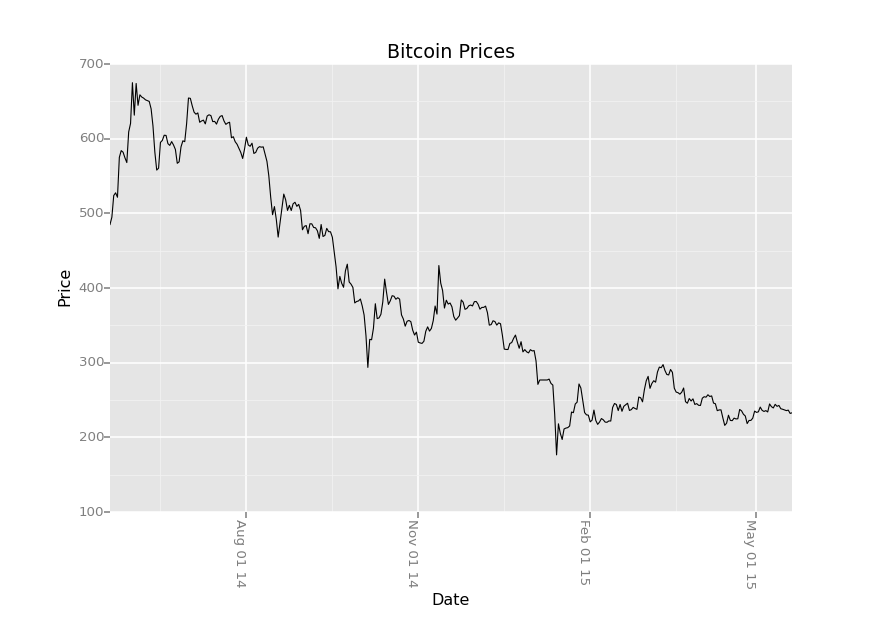

In [3]:
%matplotlib notebook
@interact
def plot_prices(month_interval=['1','3','6','12']):
    plot = ggplot(bitcoin_data, aes(x='Date', y='Price')) + \
        geom_line() + \
        ggtitle('Bitcoin Prices') + \
        scale_x_date(labels='%b %d %y',breaks=date_breaks(month_interval + ' month') )
    
    fig = plot.draw()
    ax = fig.gca()
    labels = ax.get_xticklabels() 
    for label in labels: 
        label.set_rotation(270)
    plt.show()